In [11]:
# Packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# The CSV file with all of the data is read and stored in sim
sim = pd.read_csv("sim.csv")

In [12]:
# The average RSRP of drone data points, average RSRQ of drone points,
# and that for non-drone data points are seperated into individual arrays
terrestrial_avgRSRP = []
terrestrial_avgRSRQ = []
drone_avgRSRP = []
drone_avgRSRQ = []
for index, row in sim.iterrows():
    if row.drone == 0:
        terrestrial_avgRSRP.append(row.avgRSRP) 
        terrestrial_avgRSRQ.append(row.avgRSRQ)
    else:
        drone_avgRSRP.append(row.avgRSRP) 
        drone_avgRSRQ.append(row.avgRSRQ)

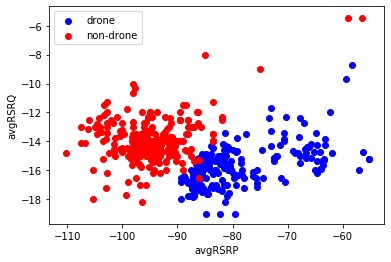

In [13]:
# Average RSRP and Average RSRQ are plotted in a scatter plot.
# Blue points represent drone data points.
# Red points represent non-drone data points
plt.xlabel('avgRSRP')
plt.ylabel('avgRSRQ')
ax = plt.gca()
ax.scatter(drone_avgRSRP, drone_avgRSRQ, color="b", label = 'drone')
ax.scatter(terrestrial_avgRSRP, terrestrial_avgRSRQ, color="r", label = 'non-drone')
ax.legend()

In [14]:
# The dependent variable is the true classification of the data point,
# drone or non-drone. The predictor variables are all other data
# parameters.
y = sim.drone.copy()
X = sim.drop(['drone'], axis=1)
features = X.columns
features = list(features)
print(features)

['avgRSRP', 'towers', 'RSSI', 'avgRSRQ']


In [15]:
# The data set is split, randomly, into a data set to be used to train the model
# and a data set used to test and evaluate the model. The data set is split such
# that 80% of the data is used for testing and the remaining 20% of the data is
# used to test the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [16]:
# The Decision Tree Model is instantiated and trained with the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# Predictions are made on the testing data set using the model
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']

In [18]:
# Performance metrics are printed
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9894736842105263
Precision: 0.975
Recall: 1.0


Feature: avgRSRP: , Score: 0.77541
Feature: towers: , Score: 0.15089
Feature: RSSI: , Score: 0.00000
Feature: avgRSRQ: , Score: 0.07370


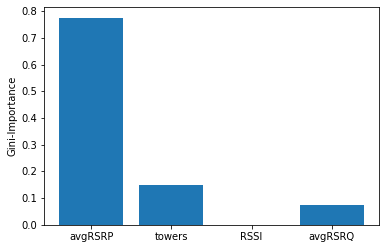

In [19]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s: , Score: %0.5f' % (features[i],v))
# plot feature importance
plt.bar(features, importance)
plt.ylabel('Gini-Importance')
plt.show()

Text(0.5, 15.0, 'Predicted')

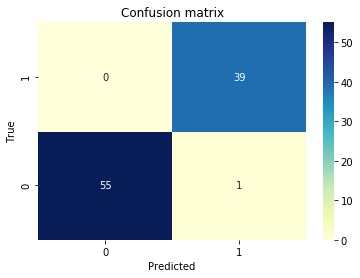

In [20]:
# Confusion matrix is created
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')